In [1]:
# Dataset - Pulsar Dataset HTRU2 by Charitarth Chugh

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # 0=all, 1=no INFO, 2=no INFO/WARN, 3=no INFO/WARN/ERROR

In [164]:
import sklearn

In [3]:
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')

if gpus:
    try:

        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
            
        tf.config.set_logical_device_configuration(
            gpus[0],
            [tf.config.LogicalDeviceConfiguration(memory_limit=3072)]
        )
        print("Success: GPU Memory Growth Enabled & Safety Limit Set")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(f"Error enabling memory growth: {e}")

/home/ahsan_47/tf_gpu_stable/lib/python3.11/site-packages/keras/src/export/tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


Success: GPU Memory Growth Enabled & Safety Limit Set


In [4]:
import tensorflow as tf
import tensorflow.keras as keras 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
from keras import layers
from keras.layers import Dense,Dropout

**Columns**:

1. Mean of the integrated profile.
2. Standard deviation of the integrated profile.
3. Excess kurtosis of the integrated profile.
4. Skewness of the integrated profile.
5. Mean of the DM-SNR curve.
6. Standard deviation of the DM-SNR curve.
7. Excess kurtosis of the DM-SNR curve.
8. Skewness of the DM-SNR curve.
9. Class

In [275]:
df = pd.read_csv("HTRU_2.csv",names=["Mean of IP","SD of IP","Exc_kurt of IP","sk of IP","Mean of curve","SD of curve","Exc_kurt of curve",
                                     "sk of curve","class"])

In [276]:
df.head()

,Mean of IP,SD of IP,Exc_kurt of IP,sk of IP,Mean of curve,SD of curve,Exc_kurt of curve,sk of curve,class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [277]:
(df).isna().sum()

Mean of IP           0
SD of IP             0
Exc_kurt of IP       0
sk of IP             0
Mean of curve        0
SD of curve          0
Exc_kurt of curve    0
sk of curve          0
class                0
dtype: int64

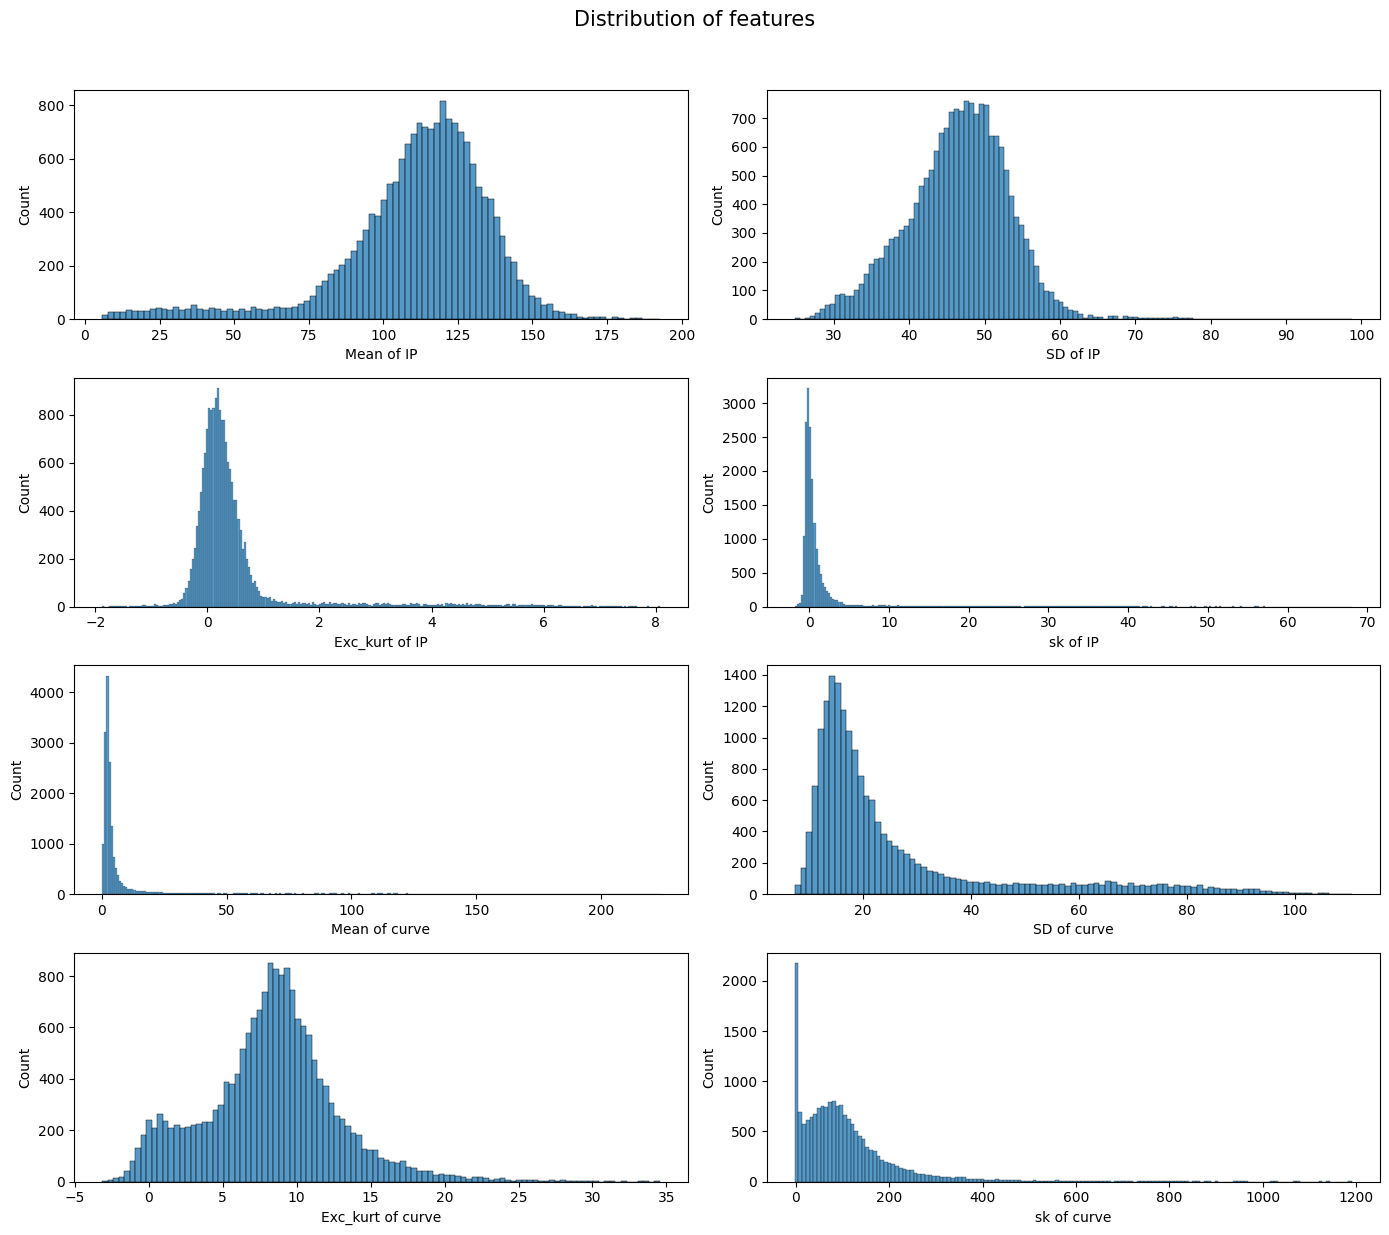

In [278]:
plt.figure(figsize=(14,12))

plt.suptitle("Distribution of features",y=1.025,fontsize=15)

for i in range(1,9,1):
    plt.subplot(4,2,i)
    sns.histplot(df.iloc[:,i-1])

plt.tight_layout()


In [279]:
df.describe()

,Mean of IP,SD of IP,Exc_kurt of IP,sk of IP,Mean of curve,SD of curve,Exc_kurt of curve,sk of curve,class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


In [280]:
from scipy import stats

In [281]:
print(df["sk of curve"].skew())

2.7345135593963974


In [282]:
print(df["Exc_kurt of curve"].skew())

0.44150086517613285


In [283]:
print(df["Mean of IP"].skew())

-1.375187645269385


In [284]:
print(np.isinf(df["Mean of IP"]).sum())

0


In [285]:
df["Mean of IP"].isnull().sum()

np.int64(0)

In [286]:
print(df["SD of IP"].skew())

0.1266410772175309


In [287]:
df["Mean of IP"],op = stats.yeojohnson(df["Mean of IP"])
df["SD of IP"],op = stats.boxcox(df["SD of IP"])
df["Exc_kurt of IP"],op = stats.yeojohnson(df["Exc_kurt of IP"])
df["sk of IP"],op = stats.yeojohnson(df["sk of IP"])
df["Mean of curve"],op = stats.boxcox(df["Mean of curve"])
df["SD of curve"] = np.log1p(df["SD of curve"])
df["Exc_kurt of curve"],op = stats.yeojohnson(df["Exc_kurt of curve"])
df["sk of curve"],op = stats.yeojohnson(df["sk of curve"])

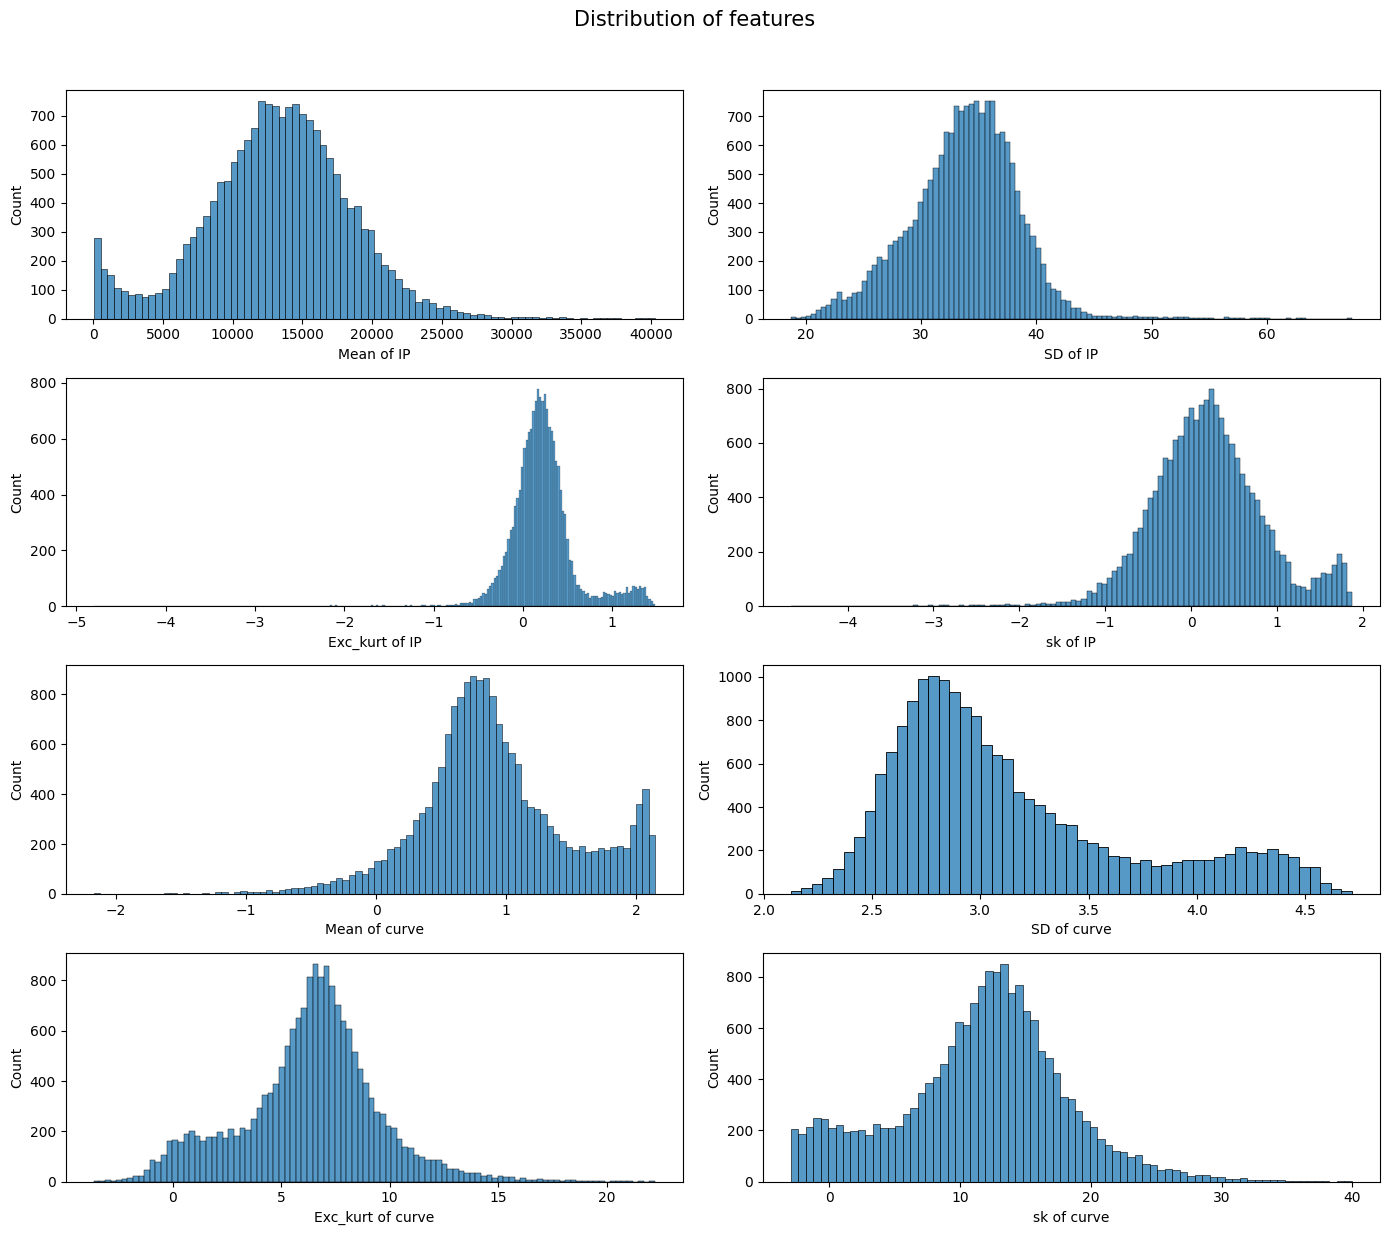

In [288]:
plt.figure(figsize=(14,12))

plt.suptitle("Distribution of features",y=1.025,fontsize=15)

for i in range(1,9,1):
    plt.subplot(4,2,i)
    sns.histplot(df.iloc[:,i-1])

plt.tight_layout()

In [289]:
from sklearn.preprocessing import MaxAbsScaler

In [290]:
scaler = MaxAbsScaler()
df = scaler.fit_transform(df)

In [291]:
pd.DataFrame(df).describe()

,0,1,2,3,4,5,6,7,8
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,0.326745,0.500781,0.044568,0.040548,0.416817,0.663850,0.285056,0.291014,0.091574
std,0.130379,0.068309,0.082030,0.142404,0.267946,0.116777,0.142142,0.163156,0.288432
min,0.000713,0.277633,-1.000000,-1.000000,-1.000000,0.450598,-0.163897,-0.073954,0.000000
25%,0.250113,0.459484,0.005535,-0.046143,0.263655,0.580406,0.211689,0.199524,0.000000
50%,0.331183,0.505273,0.040325,0.037299,0.385793,0.629531,0.295654,0.305480,0.000000
75%,0.409647,0.545708,0.074842,0.121610,0.560514,0.717229,0.364337,0.389136,0.000000
max,1.000000,1.000000,0.307832,0.401703,0.988533,1.000000,1.000000,1.000000,1.000000


In [292]:
pd.DataFrame(df)[8].isna().sum()

np.int64(0)

In [293]:
pd.DataFrame(df)[8].value_counts()

8
0.0    16259
1.0     1639
Name: count, dtype: int64

In [294]:
pd.DataFrame(df).isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [295]:
from sklearn.model_selection import train_test_split

In [296]:
X_train,X_cv,Y_train,Y_cv = train_test_split(pd.DataFrame(df).iloc[:,:8],pd.DataFrame(df).iloc[:,8:],test_size=0.3,random_state=42)
X_cv,X_test,Y_cv,Y_test = train_test_split(X_cv,Y_cv,test_size=0.5,random_state=42)

In [297]:
print(type(X_train),type(X_cv),type(X_test))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [298]:
X_train.isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64

In [299]:
X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()
X_cv = X_cv.to_numpy()
Y_cv = Y_cv.to_numpy()
X_test = X_test.to_numpy()
Y_test = Y_test.to_numpy()

In [444]:
pd.DataFrame(Y_cv).value_counts()

0  
0.0    2436
1.0     249
Name: count, dtype: int64

In [324]:
from imblearn.over_sampling import SMOTE

In [325]:
smote = SMOTE(random_state = 42)

In [326]:
X_train_bal,Y_train_bal = smote.fit_resample(X_train,Y_train)

In [328]:
pd.DataFrame(Y_train_bal).value_counts()

0  
0.0    11375
1.0    11375
Name: count, dtype: int64

In [329]:
print(type(X_train),type(X_cv),type(X_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [330]:
X_train.shape

(12528, 8)

In [331]:
Y_train.shape

(12528, 1)

In [333]:
X_train_bal.shape

(22750, 8)

In [334]:
Y_train_bal.shape

(22750,)

In [350]:
from keras import regularizers
from keras.layers import Dropout

In [447]:
model = keras.Sequential([
    Dense(256,activation="relu"),
    Dropout(0.25),
    Dense(128,activation="relu"),
    Dropout(0.10),
    Dense(32,activation="relu",kernel_regularizer = regularizers.l2(0.0001)),
    Dense(1,activation="sigmoid")
])

In [448]:
assert not np.any(np.isnan(X_train_bal))

In [449]:
model.compile(loss= keras.losses.BinaryCrossentropy(),optimizer=keras.optimizers.Adam(learning_rate = 0.003,epsilon=1e-7))

In [450]:
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau

In [451]:
reduce_lr = ReduceLROnPlateau(factor=0.5,monitor = "loss",patience = 5,min_lr = 0.00001)

In [452]:
avg_lambda = tf.keras.callbacks.LambdaCallback(
    on_epoch_end=lambda epoch, logs: logs.update({'avg_loss': (logs['loss'] + logs['val_loss']) / 2})
)

In [453]:
best_model = ModelCheckpoint(filepath="best_model.keras",monitor= "avg_loss",mode="min",save_best_only = True)

In [454]:
history = model.fit(
    X_train_bal,Y_train_bal,
    validation_data = [X_cv,Y_cv],
    callbacks = [best_model,reduce_lr],
    batch_size = 32,
    epochs = 75
)

Epoch 1/75
711/711 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.2057 - val_loss: 0.2142 - learning_rate: 0.0030
Epoch 2/75
 33/711 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1876

/home/ahsan_47/tf_gpu_stable/lib/python3.11/site-packages/keras/src/callbacks/model_checkpoint.py:276: UserWarning: Can save best model only with avg_loss available.
  if self._should_save_model(epoch, batch, logs, filepath):


711/711 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1833 - val_loss: 0.1519 - learning_rate: 0.0030
Epoch 3/75
711/711 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1716 - val_loss: 0.2303 - learning_rate: 0.0030
Epoch 4/75
711/711 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1691 - val_loss: 0.2475 - learning_rate: 0.0030
Epoch 5/75
711/711 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1638 - val_loss: 0.1591 - learning_rate: 0.0030
Epoch 6/75
711/711 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1645 - val_loss: 0.0974 - learning_rate: 0.0030
Epoch 7/75
711/711 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1606 - val_loss: 0.1148 - learning_rate: 0.0030
Epoch 8/75
711/711 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1586 - val_loss: 0.1329 - learning_rate: 0.0030
Epoch 9/75
711/711 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1569 - val_loss: 0.1943 - learning_rate: 0.0030
Epoch 10/75
711/711 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1564 - val_loss: 0.1108 - learning_rate: 0.0030
Epoch 11/75
711/711 

In [455]:
model.load_weights("best_model.keras")

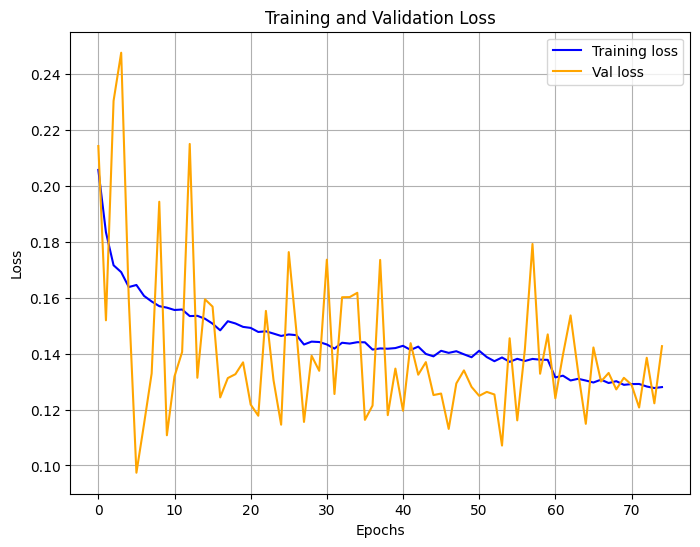

In [456]:
history_data = history.history
plt.figure(figsize=(8,6))
plt.plot(history_data["loss"],label="Training loss",color='blue')
plt.plot(history_data["val_loss"],label="Val loss",color='orange')

plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

In [508]:
y_pred = (model.predict(X_test)>0.867).astype("int32")

84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [509]:
from sklearn.metrics import precision_recall_curve,auc

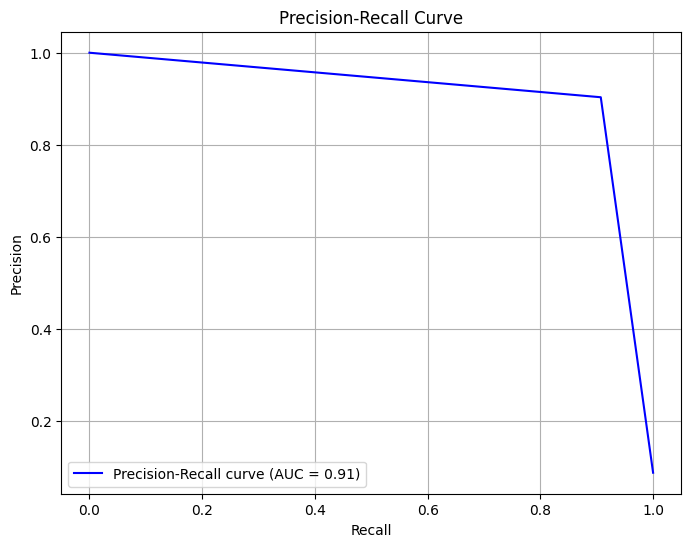

In [510]:
precision,recall,thresholds = precision_recall_curve(Y_test,y_pred)
pr_auc = auc(recall,precision)

plt.figure(figsize=(8,6))
plt.plot(recall,precision,label=f'Precision-Recall curve (AUC = {pr_auc:.2f})',color='blue')
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

In [511]:
type(y_pred)

numpy.ndarray

In [512]:
from sklearn.metrics import classification_report

In [513]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2448
         1.0       0.90      0.91      0.91       237

    accuracy                           0.98      2685
   macro avg       0.95      0.95      0.95      2685
weighted avg       0.98      0.98      0.98      2685



In [514]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [515]:
cm = confusion_matrix(Y_test,y_pred)
print(cm)

[[2425   23]
 [  22  215]]


[]

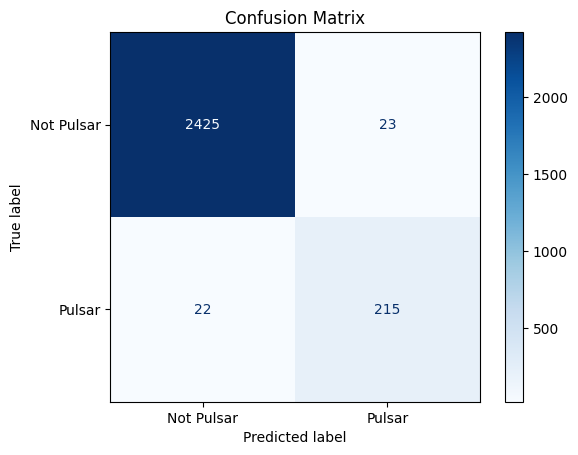

In [516]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Not Pulsar","Pulsar"])
disp.plot(cmap = plt.cm.Blues)
plt.title("Confusion Matrix")
plt.plot()